In [1]:
#dataframes sebelum normalisasi
import pandas as pd
df = pd.read_excel('data_new.xlsx')
df

,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Speiders,Ascites,Varices,Bilirubin,Alk_Phosphate,SGOT,Albumin,Protime,Histology,CLASS
0,30,1,2,2,1,1,1,2,1,2,1,1,1,2.5,165.000,64.0,2.800,43.500,2,1
1,31,1,1,2,1,1,1,2,2,1,2,2,2,8.0,122.357,101.0,2.200,43.500,2,1
2,33,1,1,2,1,1,2,2,2,2,2,1,2,0.7,63.000,80.0,3.000,31.000,2,1
3,34,1,1,2,1,1,2,1,1,2,1,2,2,2.8,127.000,182.0,3.152,43.500,1,1
4,35,1,1,2,1,2,2,2,2,1,1,1,2,1.5,138.000,58.0,2.600,43.500,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,1,2,2,1,2,2,2,2,2,2,2,2,1.2,102.000,53.0,4.300,66.571,1,2
151,67,2,1,2,1,1,2,2,2,2,2,2,2,1.5,179.000,69.0,2.900,66.571,1,2
152,69,2,2,2,1,2,2,2,2,2,2,2,2,3.2,119.000,136.0,3.978,66.571,2,2
153,72,1,2,1,1,2,2,2,1,2,2,2,2,1.0,115.000,52.0,3.400,50.000,2,2


In [2]:
df_kontinu = df[['Age', 'Bilirubin', 'Alk_Phosphate', 'SGOT', 'Albumin', 'Protime']]
df_kontinu

,Age,Bilirubin,Alk_Phosphate,SGOT,Albumin,Protime
0,30,2.5,165.000,64.0,2.800,43.500
1,31,8.0,122.357,101.0,2.200,43.500
2,33,0.7,63.000,80.0,3.000,31.000
3,34,2.8,127.000,182.0,3.152,43.500
4,35,1.5,138.000,58.0,2.600,43.500
...,...,...,...,...,...,...
150,66,1.2,102.000,53.0,4.300,66.571
151,67,1.5,179.000,69.0,2.900,66.571
152,69,3.2,119.000,136.0,3.978,66.571
153,72,1.0,115.000,52.0,3.400,50.000


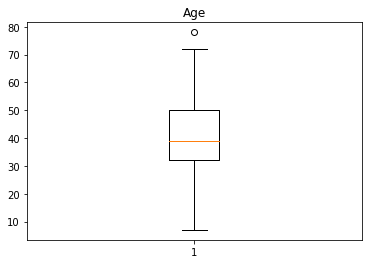

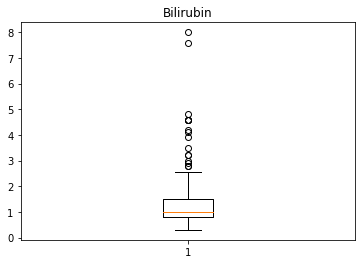

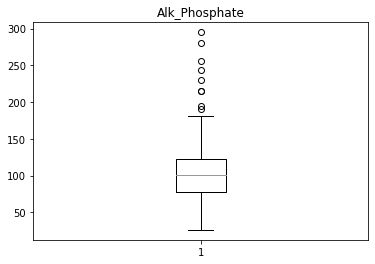

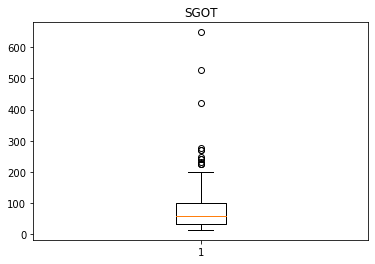

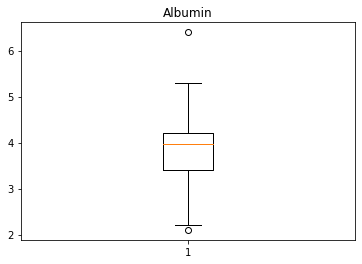

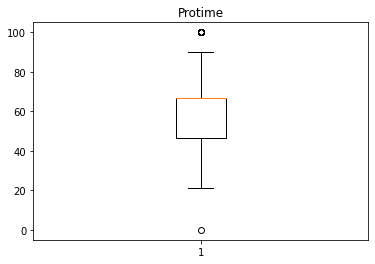

In [3]:
#boxplot data 
import matplotlib.pyplot as plt
k = df_kontinu.columns

for i in k :
    plt.boxplot(df_kontinu[i])
    plt.title(i)
    plt.show()

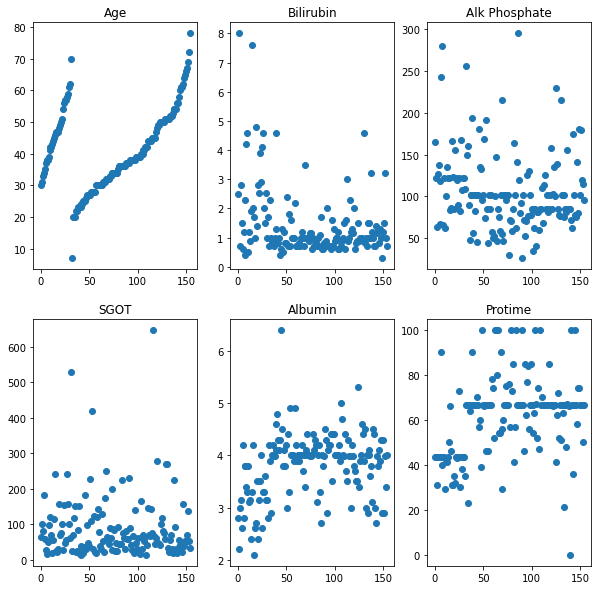

In [4]:
figure, axis = plt.subplots(2, 3, figsize=(10, 10))
axis[0, 0].scatter(range(len(df['Age'])), df['Age'])
axis[0, 0].set_title("Age")
axis[0, 1].scatter(range(len(df['Bilirubin'])), df['Bilirubin'])
axis[0, 1].set_title("Bilirubin")
axis[0, 2].scatter(range(len(df['Alk_Phosphate'])), df['Alk_Phosphate'])
axis[0, 2].set_title("Alk Phosphate")
axis[1, 0].scatter(range(len(df['SGOT'])), df['SGOT'])
axis[1, 0].set_title("SGOT")
axis[1, 1].scatter(range(len(df['Albumin'])), df['Albumin'])
axis[1, 1].set_title("Albumin")
axis[1, 2].scatter(range(len(df['Protime'])), df['Protime'])
axis[1, 2].set_title("Protime")
plt.show()

##### MENCARI OUTLIER MENGGUNAKAN IQR

In [5]:
def q1(df_kontinu):
    n = len(df_kontinu)
    i_q1 = (n+1)*(1/4)
    data_sort = df_kontinu.sort_values()
    data = data_sort.iloc[int(i_q1) - 1]
    return data

def q3(df_kontinu):
    n = len(df_kontinu)
    i_q3 = 3*(n+1)*(1/4)
    data_sort = df_kontinu.sort_values()
    data = data_sort.iloc[int(i_q3) - 1]
    return data

def iqr(df):
    iq_range = {}
    for kolom in df_kontinu.columns:
        kuartil_1 = q1(df_kontinu[kolom])
        kuartil_3 = q3(df_kontinu[kolom])
        iq_range[kolom] = kuartil_3 - kuartil_1
    return iq_range

def Batas_Bawah(df) :
    batas_bawah = {}
    for kolom in df_kontinu.columns :
        batas_bawah[kolom] = q1(df[kolom]) - (1.5*iqr(df)[kolom])
    return batas_bawah
        
def Batas_Atas(df) :
    batas_atas = {}
    for kolom in df_kontinu.columns :
        batas_atas[kolom] = q3(df[kolom]) + (1.5*iqr(df)[kolom])
    return batas_atas

def data_outlier(df):
    outlier = {}
    for kolom in df_kontinu.columns:
        outlier[kolom] = (df_kontinu[kolom] < Batas_Bawah(df_kontinu)[kolom]) | (df_kontinu[kolom] > Batas_Atas(df_kontinu)[kolom])
    return outlier

In [6]:
iqr(df)

{'Age': 18,
 'Bilirubin': 0.7,
 'Alk_Phosphate': 44.357,
 'SGOT': 68.0,
 'Albumin': 0.8000000000000003,
 'Protime': 20.570999999999998}

In [7]:
Batas_Atas(df)

{'Age': 77.0,
 'Bilirubin': 2.55,
 'Alk_Phosphate': 188.89249999999998,
 'SGOT': 202.0,
 'Albumin': 5.4,
 'Protime': 97.4275}

In [8]:
Batas_Bawah(df)

{'Age': 5.0,
 'Bilirubin': -0.24999999999999978,
 'Alk_Phosphate': 11.464500000000001,
 'SGOT': -70.0,
 'Albumin': 2.1999999999999993,
 'Protime': 15.143500000000003}

In [9]:
data_outlier(df)

{'Age': 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 150    False
 151    False
 152    False
 153    False
 154     True
 Name: Age, Length: 155, dtype: bool,
 'Bilirubin': 0      False
 1       True
 2      False
 3       True
 4      False
        ...  
 150    False
 151    False
 152     True
 153    False
 154    False
 Name: Bilirubin, Length: 155, dtype: bool,
 'Alk_Phosphate': 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 150    False
 151    False
 152    False
 153    False
 154    False
 Name: Alk_Phosphate, Length: 155, dtype: bool,
 'SGOT': 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 150    False
 151    False
 152    False
 153    False
 154    False
 Name: SGOT, Length: 155, dtype: bool,
 'Albumin': 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 150    False
 151    False
 152    False
 153    False
 154    False
 Name

#### MENGETAHUI SUATU DATA BERDISTRIBUSI LINIER ATAU TIDAK

In [3]:
import scipy.stats as stats
def jkt(y) :
    return sum(y**2)

def jka(y) :
    return (sum(y))**2 / len(y)

def jkb(x, y) :
    return ((len(x)*sum(x*y))-(sum(x)*sum(y)))/ (len(x)*sum(x**2)-(sum(x)**2)) * (sum(x*y)-(sum(x)*sum(y/len(y))))

def jkres(x, y) :
    return jkt(y) - jka(y) - jkb(x, y)

def jkg(y):
    return sum(y**2)-((sum(y)**2)/len(y))

def jktc(x, y):
    return jkres(x, y) - jkg(y)

def dbg(x) :
    k = len(x.unique())
    return len(x) - k

def dbtc(x) :
    k = len(x.unique())
    return k - 2

def rktc(x, y) :
    return jktc(x, y) / dbtc(x)

def rkg(x, y) :
    return jkg(y) / dbg(x)

def f(x, y) :
    return rktc(x, y) / rkg(x, y)

def f_tabel(x, y):
    N = len(y)
    k = len(x.unique())
    df_treatment = k - 1
    df_error = N - k
    alpha = 0.05
    f = stats.f.ppf(1 - alpha, df_treatment, df_error)
    return f

for col in df_kontinu.columns:
    x = df[col]
    y = df['CLASS']
    f_val = f(x, y)
    ftabel = f_tabel(x, y)
    print("-------------------------------------\n")
    print(f'rkg({col}) = {rkg(x, y)}')
    print(f'rktc({col}) = {rktc(x, y)}')
    print("\nMembandingkan hasil f value dengan f tabel :")
    print(f'f({col}) = {f(x, y)}')
    print(f'ftabel({col}) = {f_tabel(x,y)}')
    if f_val > ftabel:
        print('Karena f value > f tabel maka data berdistribusin linier.')
    else:
        print('Karena f value < f tabel maka data tidak berdistribusin linier.')

-------------------------------------

rkg(Age) = 0.23956177723676186
rktc(Age) = -0.02606617472064071

Membandingkan hasil f value dengan f tabel :
f(Age) = -0.10880773644820305
ftabel(Age) = 1.476761009477817
Karena f value < f tabel maka data tidak berdistribusin linier.
-------------------------------------

rkg(Bilirubin) = 0.21339116291677948
rktc(Bilirubin) = -0.16807299265271844

Membandingkan hasil f value dengan f tabel :
f(Bilirubin) = -0.7876286457010654
ftabel(Bilirubin) = 1.5220874550377463
Karena f value < f tabel maka data tidak berdistribusin linier.
-------------------------------------

rkg(Alk_Phosphate) = 0.3627649769585251
rktc(Alk_Phosphate) = -0.01030491254829506

Membandingkan hasil f value dengan f tabel :
f(Alk_Phosphate) = -0.028406580576473953
ftabel(Alk_Phosphate) = 1.4660936437198098
Karena f value < f tabel maka data tidak berdistribusin linier.
-------------------------------------

rkg(SGOT) = 0.36802244039270665
rktc(SGOT) = -0.001926119139026358

Mem